In [93]:
import nbimporter
# from main import grad_descent, plot_3d, plot_points
from task_2 import grad_descent, plot_3d, plot_points
from matplotlib import pyplot as plt, cm
import numpy as np
import random
import matplotlib.colors as mcolors

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100

In [94]:
class Func:
    def __init__(self, coefficients):
        self.coefficients = coefficients

    def __call__(self, args):
        assert len(args) == len(self.coefficients)
        return sum([arg ** 2 * c for arg, c in zip(args, self.coefficients)])

    def df(self):
        return Func(list(map(lambda x: x * 2, self.coefficients)))

    def latex(self):
        return '$' + ' + '.join(['{:.2f} \cdot x_{}^2'.format(c, i) for i, c in enumerate(self.coefficients)]) + '$'


def gen_function_with_condition_number(n, condition_number):
    mul = random.uniform(1, 10)
    max_eigen = mul * condition_number
    min_eigen = mul
    between = [random.uniform(min_eigen, max_eigen) for _ in range(n - 2)]
    coefficients = [max_eigen, min_eigen] + between
    # random.shuffle(coefficients)

    return Func(coefficients)

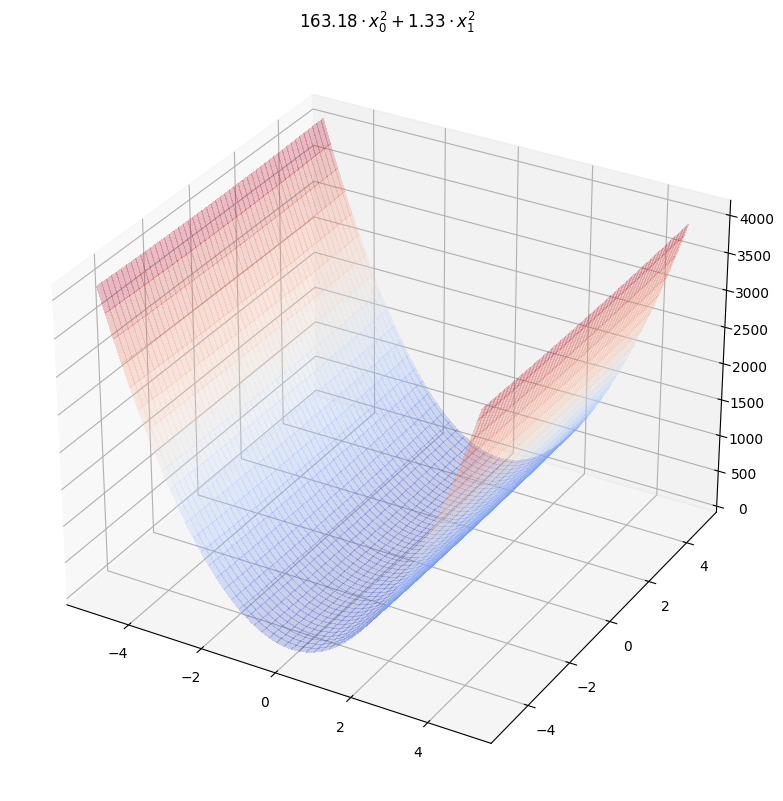

In [95]:
f = gen_function_with_condition_number(2, 123)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plot_3d(ax, f, [-5, 5], [-5, 5])
ax.set_title(f.latex())
plt.show()

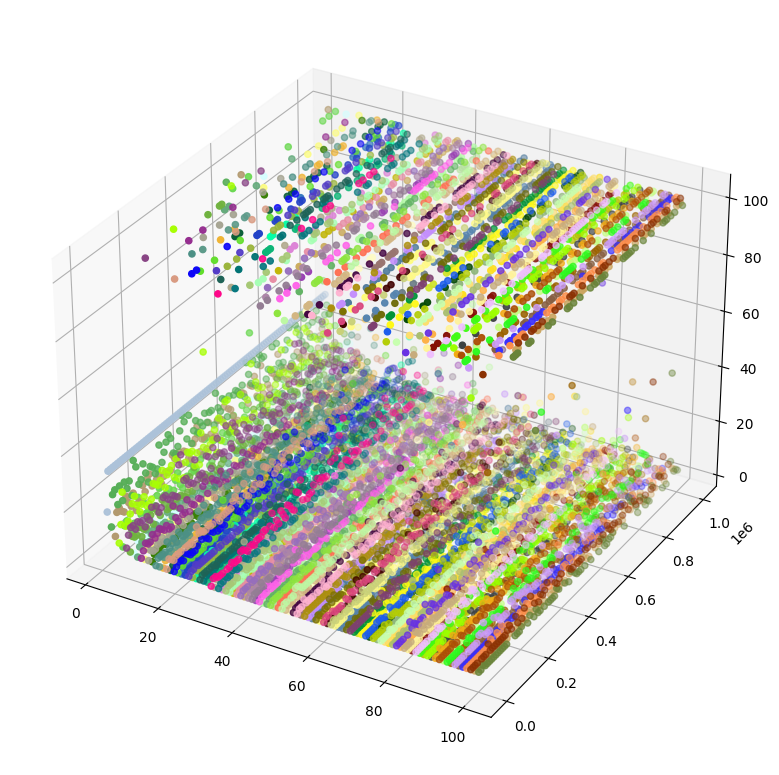

In [96]:
results = []
max_n = 100
max_mu = 1e6
starts = [
    [[30, 0.001, *[0 for _ in range(n - 2)]] for _ in range(1)]
    for n in range(2, max_n + 1)]
for n in range(2, max_n + 1):
    results_n = []
    for condition_number in np.linspace(1, max_mu, 100):
        f = gen_function_with_condition_number(n, condition_number)
        lens = []
        for start in starts[n - 2]:
            points = grad_descent(f, f.df(), start, max_iters=100)
            lens.append(len(points))
        results_n.append([n, condition_number, sum(lens) / len(lens)])
    results.append(results_n)

results = np.array(results)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
colors = []
for r, c in zip(results, mcolors.XKCD_COLORS):
    ax.scatter3D(r[:, 0], r[:, 1], r[:, 2], c=c)
plt.show()

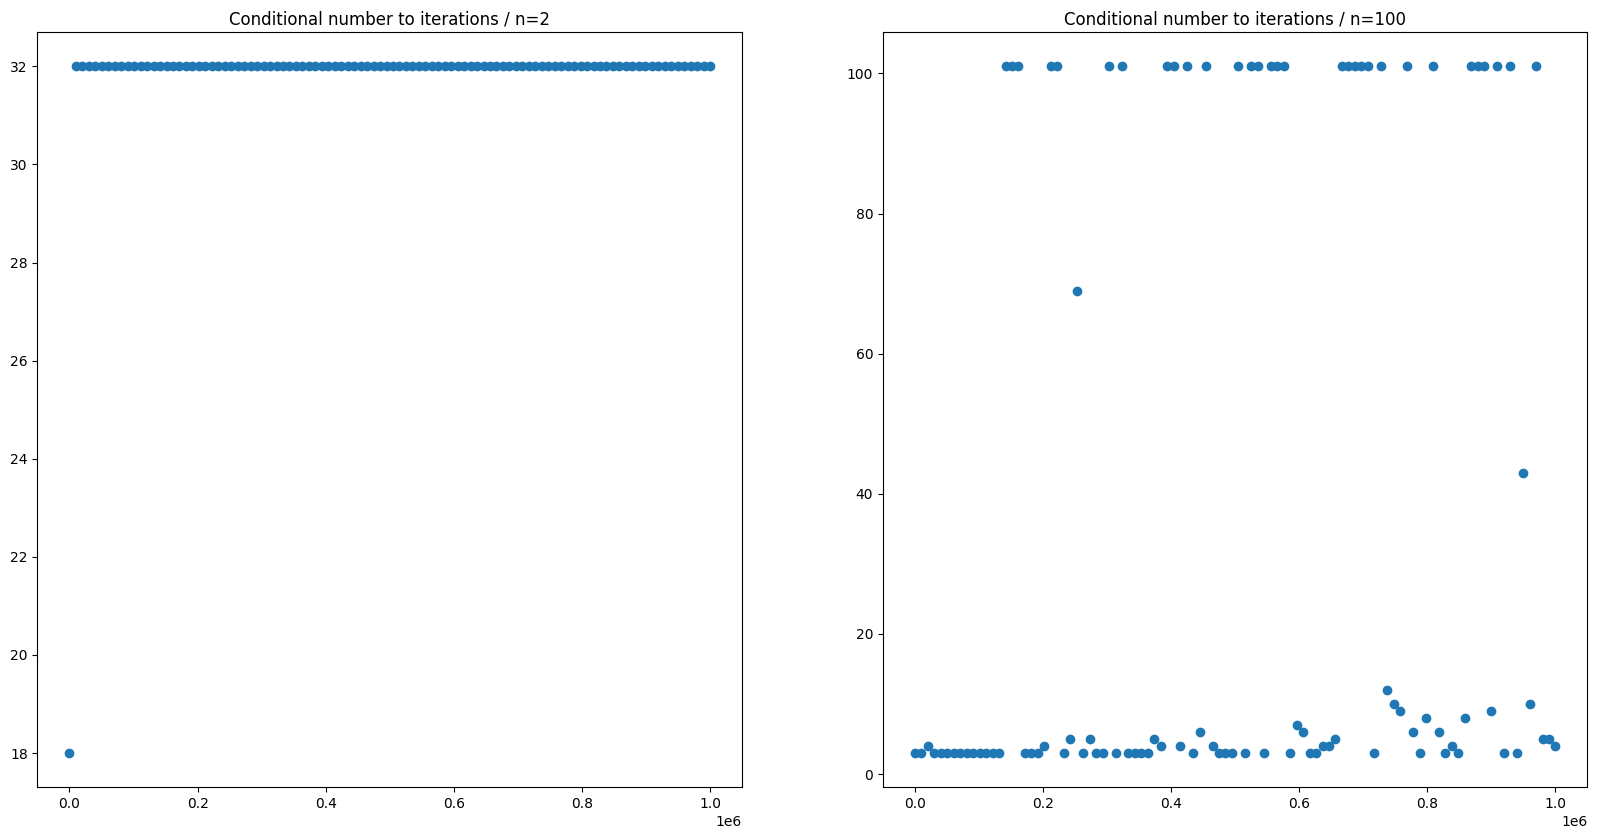

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 10])
ax1.scatter(results[0,:, 1], results[0, :, 2])
ax1.set_title("Conditional number to iterations / n=2")

ax2.scatter(results[-1,:, 1], results[-1, :, 2])
ax2.set_title(f"Conditional number to iterations / n={max_n}")
plt.show()

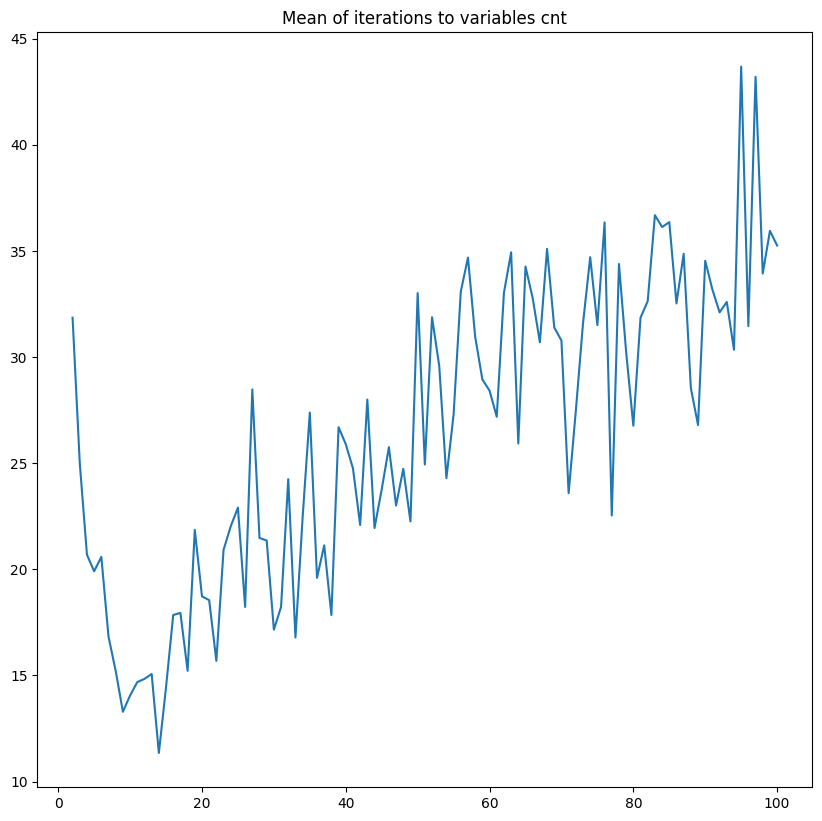

In [105]:
plt.plot(range(2, max_n + 1), [np.mean(r[:, 2]) for r in results])
plt.title("Mean of iterations to variables cnt")
plt.show()

Количество итераций сильно зависит от стартовой точки.<br/>
При росте количества переменных, среднее количество операций растет.<br/>

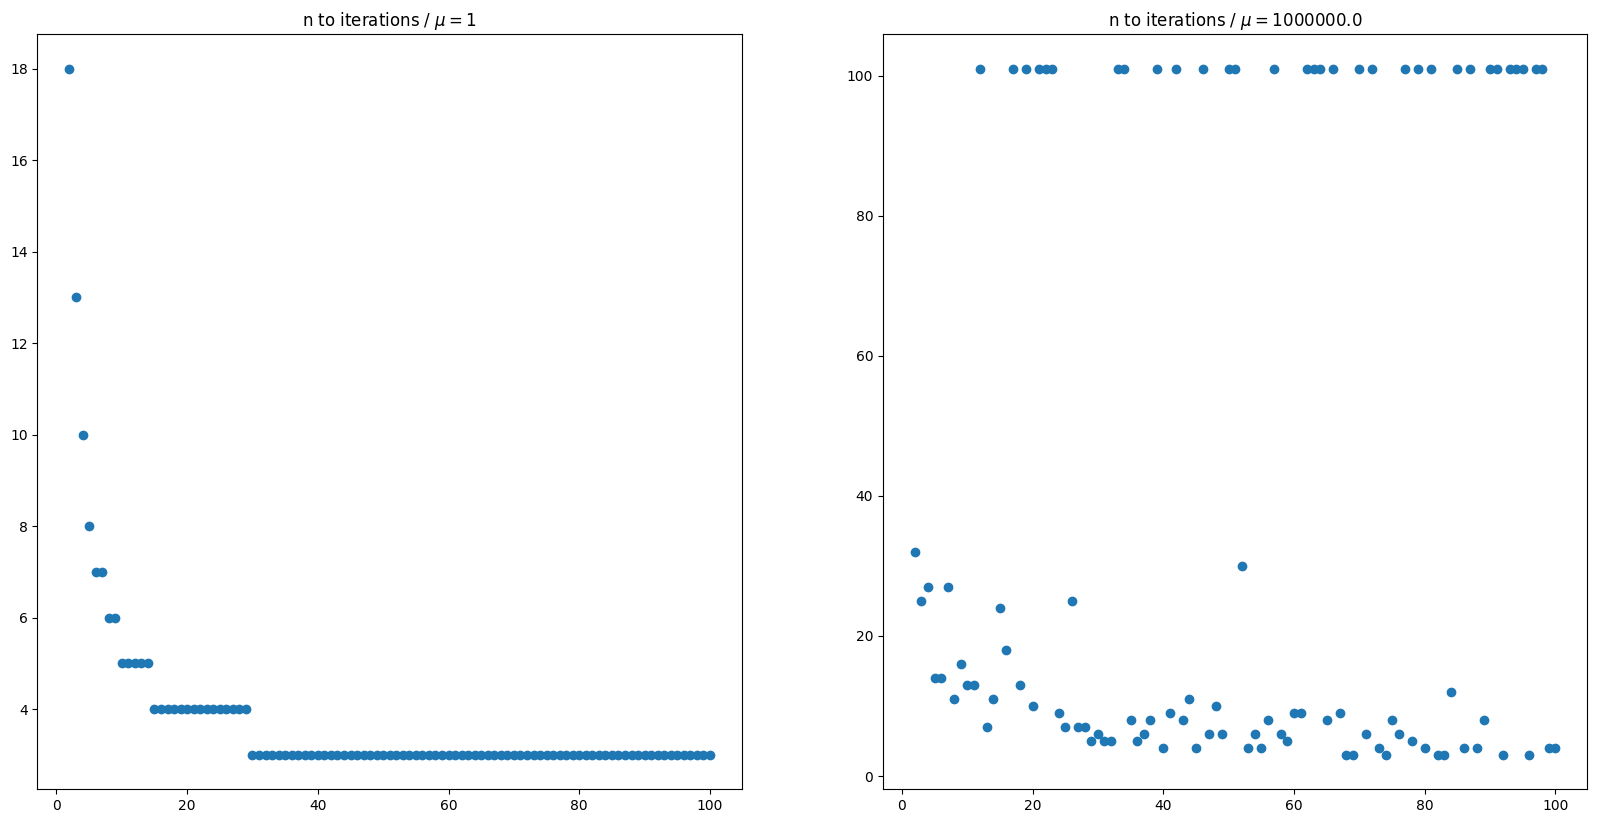

In [100]:
results_array = np.vstack(results)
grouped_by_condition_number = results_array[results_array[:, 1].argsort()]
splitted = np.array_split(grouped_by_condition_number, results.shape[1])
test = np.stack(splitted)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 10])
ax1.scatter(test[0,:, 0], test[0, :, 2])
ax1.set_title("n to iterations / $\mu = 1$")

ax2.scatter(test[-1,:, 0], test[-1, :, 2])
ax2.set_title(f"n to iterations / $\mu = {max_mu}$")
plt.show()

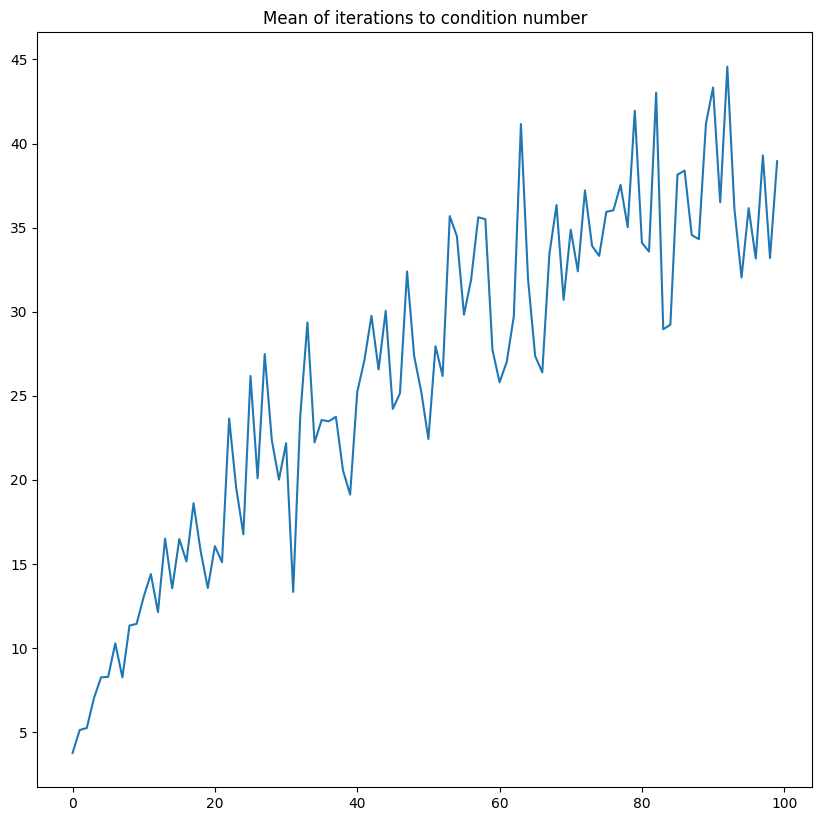

In [106]:
plt.plot(range(100), [np.mean(r[:, 2]) for r in splitted])
plt.title("Mean of iterations to condition number")
plt.show()

При росте числа обусловленности, среднее количество операций растет.<br/>